In [1]:

import os
os.environ['NUMEXPR_MAX_THREADS'] = '40'
os.environ['NUMEXPR_NUM_THREADS'] = '40'
import logging
logging.basicConfig()
logging.getLogger('glets').setLevel(logging.INFO)
logging.debug("test")

In [2]:

import glets
import logging

logging.getLogger().setLevel(logging.INFO)
import importlib
import numpy as np

import matplotlib.pyplot as plt
#get_ipython().run_cell_magic('bash', '', "cat /proc/cpuinfo | grep 'model name' | uniq\ncat /proc/cpuinfo | grep 'cpu family' | uniq\n lscpu | grep 'Model:' | uniq\n lscpu | egrep '^Thread|^Core|^Socket|^CPU\\('\n")

In [6]:
importlib.reload(glets)
gwfr = glets.Rayfront(wavelength=2.2e-6,size=5e-4,
                samplescheme='fibbonacci')
osys = glets.GaubletOpticalSystem(epd=5e-4,dimd=4e-4,npix=512)
osys.add_aperture(shape='lyot',diameter=5e-4)
osys.add_optic(efl=5e-3)
osys.add_distance(distance=5e-3,index=1)
#osys.add_aperture(shape='fpm',diameter=2.5e-4)
osys.add_detector()
%time gwfr.propogate(elements=osys.elements)

INFO:poppy:initial Q[[0.-5787.45247607j 0.   +0.j        ]
 [0.   +0.j         0.-5787.45247607j]]
INFO:poppy:numbeamlets across grid = 1285
INFO:poppy:det(A):0.0


Vignetting Rays
Remaining Rays =  1281
Evaluating Rayfront


INFO:poppy:phase cube shape:(512, 512, 1281)
INFO:poppy:(-3.0237642781971206e-06-14279.888544203048j)
INFO:poppy:[[200.-6.91150384j   0.+0.j        ]
 [  0.+0.j         200.-6.91150384j]]
INFO:poppy:Q[[0. 0.]
 [0. 0.]]
INFO:poppy:orig_matrix[[0. 0.]
 [0. 0.]]
INFO:poppy:cros[[200.+0.j   0.+0.j]
 [  0.+0.j 200.+0.j]]
INFO:poppy:A[[0. 0.]
 [0. 0.]]
INFO:poppy:B[[0.005 0.   ]
 [0.    0.005]]
INFO:poppy:[[-0.0002     -0.00019922 -0.00019843 ...  0.00019843  0.00019922
   0.0002    ]
 [-0.0002     -0.00019922 -0.00019843 ...  0.00019843  0.00019922
   0.0002    ]
 [-0.0002     -0.00019922 -0.00019843 ...  0.00019843  0.00019922
   0.0002    ]
 ...
 [-0.0002     -0.00019922 -0.00019843 ...  0.00019843  0.00019922
   0.0002    ]
 [-0.0002     -0.00019922 -0.00019843 ...  0.00019843  0.00019922
   0.0002    ]
 [-0.0002     -0.00019922 -0.00019843 ...  0.00019843  0.00019922
   0.0002    ]]
INFO:poppy:[[-0.0002     -0.0002     -0.0002     ... -0.0002     -0.0002
  -0.0002    ]
 [-0.00019922 -0.

CPU times: user 1min 18s, sys: 4.08 s, total: 1min 22s
Wall time: 5.09 s


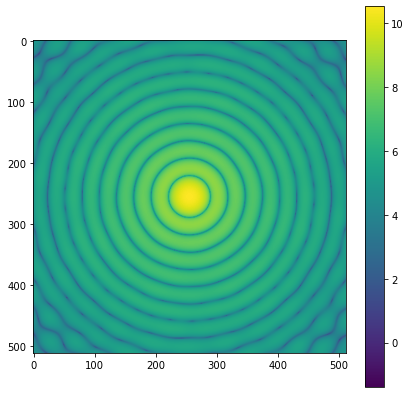

In [7]:

# Set up figure
plt.figure(figsize=[7,7])
plt.imshow(np.log(np.abs(gwfr.Ephase)))
plt.colorbar()
plt.show()

# Lyot stop needs to be shifted on-axis
# it's the same index responsible for both lists (y >= 0, x >= 0)

In [ ]:
%time gwfr.propogate(elements=osys.elements)

In [ ]:
%prun gwfr.propogate(elements=osys.elements)

In [ ]:
import numexpr as ne
import numpy as np
import numba 
np.__file__,ne.__file__, numba.__file__

In [ ]:
import numpy as np
z=np.ones([512,512,2000])+np.pi*1j


In [ ]:
import numba
import cmath
dtype=numba.complex128

@numba.vectorize([dtype(dtype)],
                 target="parallel")
def numba_exp(x):
        return cmath.exp(x)
    

@numba.vectorize([dtype(dtype)],
                 target="cuda")
def gpu_numba_exp(x):
        return cmath.exp(x)

In [ ]:
%time ez = poppy.accel_math._exp(z)
%time eznp = np.exp(z)
%time ez = ne.evaluate("exp(z)")

In [ ]:
%time nez=numba_exp(z)

In [ ]:
try:
    get_ipython().run_cell_magic('bash', '', 'nvidia-smi\n')

except Exception as err:
    print(err)
